In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('C:/Users/admin/Desktop/ExcelR/Data Science ass/Simple linear regression/delivery_time.csv')

In [3]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
Data=data.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)

In [6]:
Data.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [7]:
Data.isnull().sum()

delivery_time    0
sorting_time     0
dtype: int64

# Data Visualisation & EDA

In [8]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   delivery_time  21 non-null     float64
 1   sorting_time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


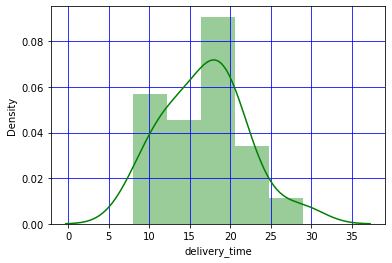

In [15]:
sns.distplot(Data.delivery_time,color='g')
plt.grid(color='b')

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


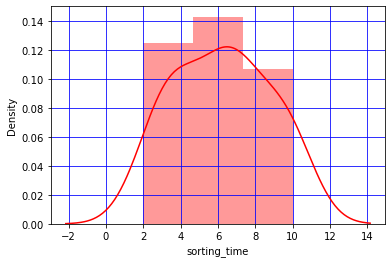

In [16]:
sns.distplot(Data.sorting_time,color='r')
plt.grid(color='b')

Text(0.5, 1.0, 'Scatter Plot')

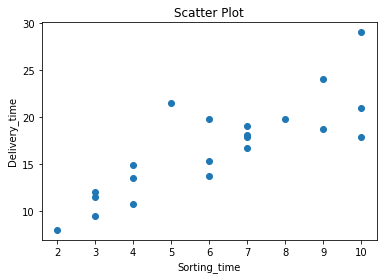

In [21]:
plt.scatter(Data.sorting_time,Data.delivery_time)
plt.xlabel('Sorting_time')
plt.ylabel('Delivery_time')
plt.title("Scatter Plot")

 # Correlation Analysis

In [22]:
Data.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

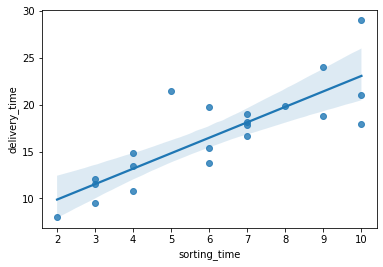

In [28]:
sns.regplot(x='sorting_time',y='delivery_time',data=Data)

# Building Model

In [26]:
import statsmodels.formula.api as smf

In [40]:
model=smf.ols("delivery_time~sorting_time",data=Data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 02 Jul 2022   Prob (F-statistic):           3.98e-06
Time:                        10:28:41   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
# Coefficient parameter
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [42]:
# p & t-value
print(model.pvalues)
print(model.tvalues)

Intercept       0.001147
sorting_time    0.000004
dtype: float64
Intercept       3.823349
sorting_time    6.387447
dtype: float64


In [43]:
# R-squared and adj.rsquared value
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [52]:
model.conf_int(0.05) # 95% confidence interval

,0,1
Intercept,2.979134,10.186334
sorting_time,1.108673,2.189367


In [63]:
predi=model.predict(pd.DataFrame(Data['sorting_time']))    # Predicted values of delivery_time using the model

In [64]:
predi

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [65]:
predi.corr(Data.delivery_time)

0.8259972607955325

Text(0, 0.5, 'Delivery_time')

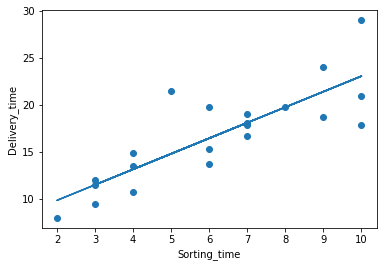

In [84]:
plt.scatter(Data.sorting_time,Data.delivery_time)
plt.plot(Data.sorting_time,predi)
plt.xlabel('Sorting_time')
plt.ylabel('Delivery_time')

In [161]:
rmse = np.sqrt(np.mean((predi-Data.delivery_time)**2)) 

In [162]:
rmse

2.7916503270617654

In [163]:
#### Residuals Vs Fitted values
import matplotlib.pyplot as plt

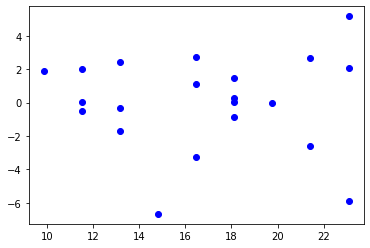

In [165]:
plt.scatter(predi,(predi-Data.delivery_time),c="b")


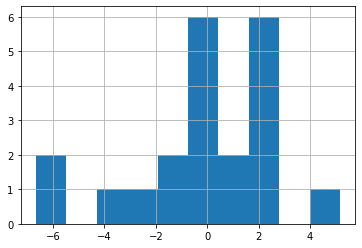

In [167]:
# checking normal distribution for residual
plt.hist(predi-Data.delivery_time)
plt.grid()

### Transforming Variables for accuracy

In [51]:
model2=smf.ols('delivery_time~np.log(sorting_time)',data=Data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sat, 02 Jul 2022   Prob (F-statistic):           2.64e-06
Time:                        10:34:38   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(sorting_time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
# Coefficient parameter
model2.params

Intercept               1.159684
np.log(sorting_time)    9.043413
dtype: float64

In [54]:
# p & t-value
print(model2.pvalues)
print(model2.tvalues)

Intercept               0.641980
np.log(sorting_time)    0.000003
dtype: float64
Intercept               0.472460
np.log(sorting_time)    6.586789
dtype: float64


In [55]:
# R-squared and adj.rsquared value
(model2.rsquared,model2.rsquared_adj)

(0.6954434611324223, 0.6794141696130761)

In [56]:
model2.conf_int(0.05) # 95% confidence interval

,0,1
Intercept,-3.97778,6.297147
np.log(sorting_time),6.16977,11.917057


In [60]:
predi2=model2.predict(pd.DataFrame(Data['sorting_time']))    # Predicted values of delivery_time using the model

In [61]:
predi2

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

In [62]:
predi2.corr(Data.delivery_time)

0.8339325279256244

Text(0, 0.5, 'Delivery_time')

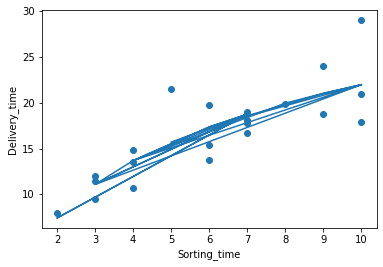

In [82]:
plt.scatter(Data.sorting_time,Data.delivery_time)
plt.plot(Data.sorting_time,predi2)
plt.xlabel('Sorting_time')
plt.ylabel('Delivery_time')

In [168]:
rmse2 = np.sqrt(np.mean((predi2-Data.delivery_time)**2)) 

In [169]:
rmse2

2.733171476682066

In [172]:
#### Residuals Vs Fitted values
import matplotlib.pyplot as plt

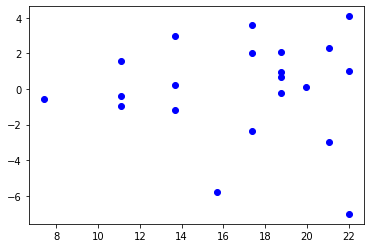

In [171]:
plt.scatter(predi2,(predi2-Data.delivery_time),c="b")


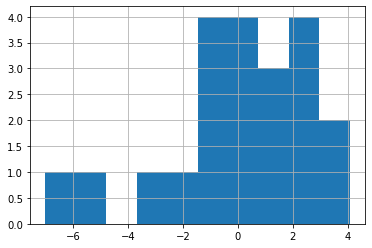

In [170]:
# checking normal distribution for residual
plt.hist(predi2-Data.delivery_time)
plt.grid()

((array([-1.84569542, -1.41352783, -1.14765351, -0.94487504, -0.77501005,
         -0.62504005, -0.48799157, -0.35957249, -0.23684388, -0.11759451,
          0.        ,  0.11759451,  0.23684388,  0.35957249,  0.48799157,
          0.62504005,  0.77501005,  0.94487504,  1.14765351,  1.41352783,
          1.84569542]),
  array([-7.01708747, -5.78550401, -2.96990618, -2.38669479, -1.18348341,
         -0.93511133, -0.57189995, -0.40511133, -0.24264646,  0.13493314,
          0.19651659,  0.64735354,  0.92735354,  0.98291253,  1.59488867,
          2.01330521,  2.07735354,  2.28009382,  2.94651659,  3.61330521,
          4.08291253])),
 (2.8328484577682578, -1.473227823660693e-15, 0.9618853136651828))

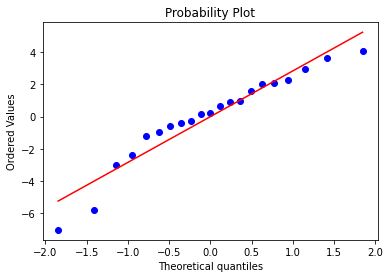

In [173]:
import pylab
import scipy.stats as st
st.probplot(predi2-Data.delivery_time,dist="norm",plot=pylab)

### Exponential Transformation

In [69]:
model3=smf.ols('np.log(delivery_time)~sorting_time',data=Data).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Sat, 02 Jul 2022   Prob (F-statistic):           1.59e-06
Time:                           10:58:55   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
sorting_time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
# Coefficient parameter
model3.params

Intercept       2.121372
sorting_time    0.105552
dtype: float64

In [71]:
# p & t-value
print(model3.pvalues)
print(model3.tvalues)

Intercept       1.857343e-14
sorting_time    1.592708e-06
dtype: float64
Intercept       20.601357
sorting_time     6.836088
dtype: float64


In [72]:
# R-squared and adj.rsquared value
(model3.rsquared,model3.rsquared_adj)

(0.7109478980584187, 0.6957346295351776)

In [73]:
model3.conf_int(0.05) # 95% confidence interval

,0,1
Intercept,1.905848,2.336896
sorting_time,0.073235,0.137869


In [74]:
predi3=model3.predict(pd.DataFrame(Data['sorting_time']))    # Predicted values of delivery_time using the model

In [75]:
predi3

0     3.176888
1     2.543578
2     2.754681
3     3.071336
4     3.176888
5     2.754681
6     2.860233
7     2.438027
8     3.176888
9     3.071336
10    2.965785
11    2.543578
12    2.860233
13    2.438027
14    2.438027
15    2.543578
16    2.754681
17    2.860233
18    2.332475
19    2.860233
20    2.649130
dtype: float64

In [76]:
predi4=np.exp(predi3)

In [77]:
predi4

0     23.972032
1     12.725123
2     15.716034
3     21.570707
4     23.972032
5     15.716034
6     17.465597
7     11.450423
8     23.972032
9     21.570707
10    19.409927
11    12.725123
12    17.465597
13    11.450423
14    11.450423
15    12.725123
16    15.716034
17    17.465597
18    10.303411
19    17.465597
20    14.141728
dtype: float64

In [78]:
predi4.corr(Data.delivery_time)

0.808578010828926

Text(0, 0.5, 'Delivery_time')

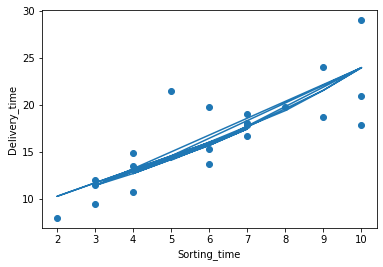

In [83]:
plt.scatter(Data.sorting_time,Data.delivery_time)
plt.plot(Data.sorting_time,predi4)
plt.xlabel('Sorting_time')
plt.ylabel('Delivery_time')

In [85]:
resid_3=predi3-Data.delivery_time

In [90]:
resid_3.head()

0   -17.823112
1   -10.956422
2   -16.995319
3   -20.928664
4   -25.823112
dtype: float64

In [ ]:
# so we will consider the model having highest R-Squared value which is the log transformation - model3
# getting residuals of the entire data set

In [104]:
s_resid = model3.resid_pearson 


In [105]:
s_resid

array([-0.75408795,  0.33675889,  1.3016092 ,  0.60797197,  1.08475764,
       -0.13425573,  0.47972269, -1.06383166, -1.66402537, -0.79839415,
        0.12198057, -0.9609301 , -0.26219179,  0.02461332,  0.28130094,
        0.89124014, -0.7613643 ,  0.20640995, -1.44153627,  0.11763994,
        2.38661208])

Text(0, 0.5, 'Standardized Residual')

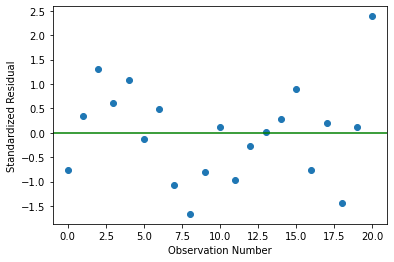

In [108]:
plt.plot(s_resid,'o')
plt.axhline(y=0,color='green')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")


Text(0, 0.5, 'Actual')

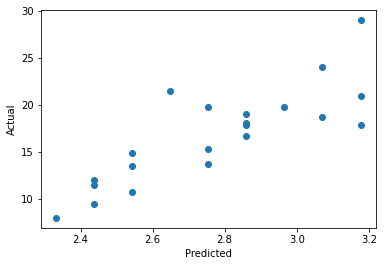

In [107]:
# Predicted vs actual values
plt.scatter(x=predi3,y=Data.delivery_time)
plt.xlabel("Predicted")
plt.ylabel("Actual")


In [174]:
rmse3 = np.sqrt(np.mean((predi3-Data.delivery_time)**2)) 

In [175]:
rmse3

14.795516941016686

In [ ]:
#### Residuals Vs Fitted values
import matplotlib.pyplot as plt

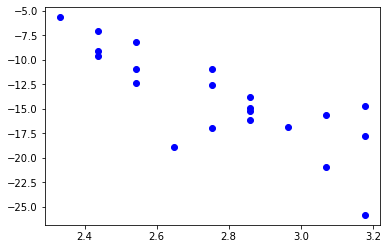

In [176]:
plt.scatter(predi3,(predi3-Data.delivery_time),c="b")


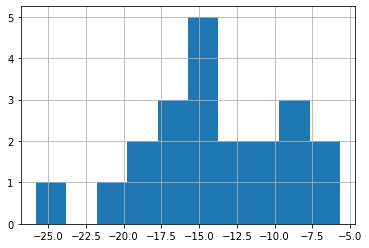

In [177]:
# checking normal distribution for residual
plt.hist(predi3-Data.delivery_time)
plt.grid()

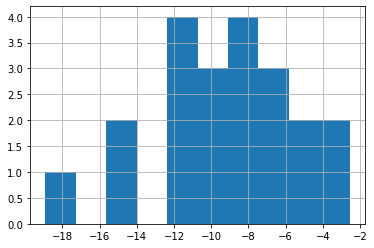

In [194]:
# checking normal distribution for residuals
plt.hist((predi3)**2-Data.delivery_time)
plt.grid()

((array([-1.84569542, -1.41352783, -1.14765351, -0.94487504, -0.77501005,
         -0.62504005, -0.48799157, -0.35957249, -0.23684388, -0.11759451,
          0.        ,  0.11759451,  0.23684388,  0.35957249,  0.48799157,
          0.62504005,  0.77501005,  0.94487504,  1.14765351,  1.41352783,
          1.84569542]),
  array([-25.82311217, -20.92866376, -18.85087016, -17.82311217,
         -16.99531856, -16.86421536, -16.13976696, -15.67866376,
         -15.24976696, -14.96976696, -14.72311217, -13.81976696,
         -12.59531856, -12.33642175, -10.99531856, -10.95642175,
          -9.59197335,  -9.06197335,  -8.20642175,  -7.06197335,
          -5.66752495])),
 (5.042606498921085, -14.01616587212325, 0.9875771432328746))

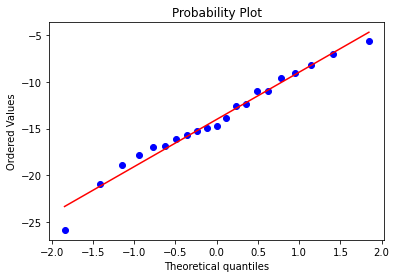

In [178]:
import pylab
import scipy.stats as st
st.probplot(predi3-Data.delivery_time,dist="norm",plot=pylab)

((array([-1.84569542, -1.41352783, -1.14765351, -0.94487504, -0.77501005,
         -0.62504005, -0.48799157, -0.35957249, -0.23684388, -0.11759451,
          0.        ,  0.11759451,  0.23684388,  0.35957249,  0.48799157,
          0.62504005,  0.77501005,  0.94487504,  1.14765351,  1.41352783,
          1.84569542]),
  array([-18.90738369, -14.56689372, -14.48211107, -12.16173015,
         -11.03412148, -10.90738369, -10.81906695,  -9.92906695,
          -9.64906695,  -9.31689372,  -8.49906695,  -8.4102097 ,
          -7.80738369,  -7.76173015,  -7.0302097 ,  -6.16173015,
          -6.08602606,  -5.55602606,  -4.2802097 ,  -3.55602606,
          -2.55956014])),
 (4.072620778963059, -9.022947464219577, 0.9823062470834596))

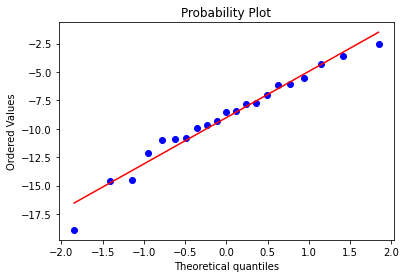

In [195]:
st.probplot((predi3)**2-Data.delivery_time,dist="norm",plot=pylab)

### Quadratic model

In [133]:
# preparing another model by taking squaring of sorting time
sorting_time_sq=Data.sorting_time*Data.sorting_time

In [135]:
sorting_time_sq.head()

0    10000
1      256
2     1296
3     6561
4    10000
Name: sorting_time, dtype: int64

In [138]:
Data["sorting_time_sq"]=Data.sorting_time*Data.sorting_time

In [141]:
Data.head()

,delivery_time,sorting_time,sorting_time_sq
0,21.00,100,10000
1,13.50,16,256
2,19.75,36,1296
3,24.00,81,6561
4,29.00,100,10000


In [142]:
model_quad=smf.ols("delivery_time~sorting_time+sorting_time_sq",data=Data).fit()
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     18.56
Date:                Sat, 02 Jul 2022   Prob (F-statistic):           4.22e-05
Time:                        13:04:49   Log-Likelihood:                -51.645
No. Observations:                  21   AIC:                             109.3
Df Residuals:                      18   BIC:                             112.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           9.1918      1.758      5.228      0.000       5.498      12.886
sorting_time        0.2506      0.084      2.975      0.008       0.074       0.428
sorting_time_sq    -0.0012      0.001     -1.542      0.140      -0.003       0.000
==============================================================================
Omnibus:                        6.116   Durbin-Watson:                   1.289
Prob(Omnibus):                  0.047   Jarque-Bera (JB):                4.021
Skew:                           1.028   Prob(JB):                        0.134
Kurtosis:                       3.609   Cond. No.                     1.20e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [143]:
predi_quad=model_quad.predict()

In [144]:
predi_quad

array([22.309679  , 12.89547757, 16.66534799, 21.65493759, 22.309679  ,
       16.66534799, 18.603513  , 11.35034601, 22.309679  , 21.65493759,
       20.338353  , 12.89547757, 18.603513  , 11.35034601, 11.35034601,
       12.89547757, 16.66534799, 18.603513  , 10.17503715, 18.603513  ,
       14.71013097])

Text(0, 0.5, 'Delivery_time')

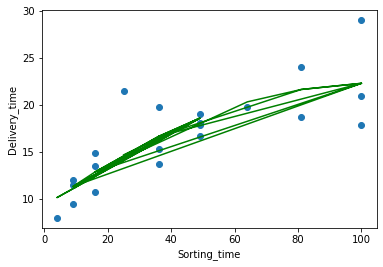

In [152]:
plt.scatter(Data.sorting_time,Data.delivery_time)
plt.plot(Data.sorting_time,predi_quad,color='g')
plt.xlabel('Sorting_time')
plt.ylabel('Delivery_time')

Text(0, 0.5, 'Standardized Residual')

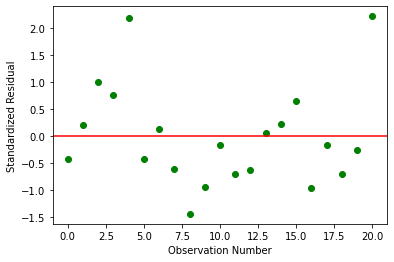

In [151]:
plt.scatter(np.arange(21),model_quad.resid_pearson,color='g')
plt.axhline(y=0,color='r')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")


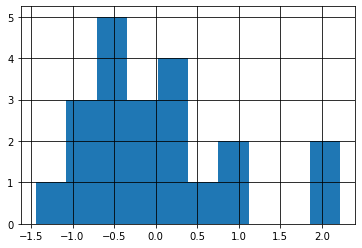

In [156]:
plt.hist(model_quad.resid_pearson)
plt.grid(color='black')

((array([-1.84569542, -1.41352783, -1.14765351, -0.94487504, -0.77501005,
         -0.62504005, -0.48799157, -0.35957249, -0.23684388, -0.11759451,
          0.        ,  0.11759451,  0.23684388,  0.35957249,  0.48799157,
          0.62504005,  0.77501005,  0.94487504,  1.14765351,  1.41352783,
          1.84569542]),
  array([-6.78986903, -6.690321  , -3.08465201, -2.34506241, -1.98452243,
         -0.67965399, -0.60452243, -0.396487  , -0.14965399,  0.493513  ,
          0.508353  ,  0.773513  ,  1.309679  ,  1.31534799,  1.85034601,
          1.923513  ,  2.14547757,  2.17503715,  2.90493759,  2.91534799,
          4.409679  ])),
 (2.897954131677883, -3.564970346995916e-14, 0.9502624571784707))

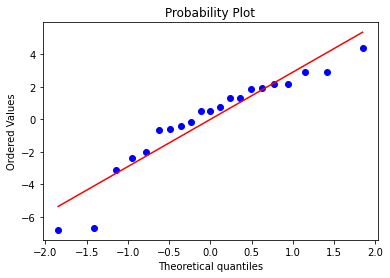

In [196]:
st.probplot(predi_quad-Data.delivery_time,dist="norm",plot=pylab)

((array([-1.84569542, -1.41352783, -1.14765351, -0.94487504, -0.77501005,
         -0.62504005, -0.48799157, -0.35957249, -0.23684388, -0.11759451,
          0.        ,  0.11759451,  0.23684388,  0.35957249,  0.48799157,
          0.62504005,  0.77501005,  0.94487504,  1.14765351,  1.41352783,
          1.84569542]),
  array([ 95.53138098, 116.80035457, 117.33035457, 119.33035457,
         151.41334173, 152.79334173, 155.54334173, 194.88795326,
         257.98382365, 262.38382365, 263.98382365, 327.09069593,
         327.98069593, 328.26069593, 329.41069593, 393.81860257,
         444.93632192, 450.18632192, 468.72177703, 476.72177703,
         479.82177703])),
 (136.5144305885118, 281.66339310987286, 0.9648899038119105))

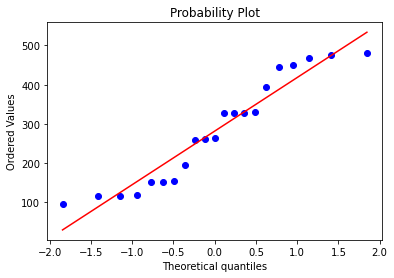

In [197]:
st.probplot((predi_quad)**2-Data.delivery_time,dist="norm",plot=pylab)